In [45]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import matplotlib.pyplot as plt
from hyperopt.pyll import scope
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from statsmodels.tools import add_constant

In [2]:
data = pd.read_csv('분석용 데이터 최종_과속방지턱제거_불량산책로추가_진짜최종.csv', encoding='EUC-KR', index_col = 0)

In [6]:
data_not = data.loc[:,[x for x in data.columns if x != 'total']]

In [7]:
y = data['total']

In [8]:
X = xgb.DMatrix(pd.DataFrame(scaler.fit_transform(data_not), columns=[x for x in data_not.columns]), label=y)

In [118]:
params = {'objective' : 'reg:squarederror',
          'max_depth' : 5,
          'gamma' : 1,
          'colsample_bytree' : 0.4,
          'subsample':0.5
    
}

res = xgb.cv(params=params,
               dtrain=X, 
               nfold=10, 
               num_boost_round=5000,
               early_stopping_rounds=30,
               metrics="rmse",
            seed=42)

In [119]:
res

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,78.135661,2.893666,78.606150,15.242410
1,65.962138,3.238254,71.406373,14.876101
2,57.214833,3.100817,64.568110,12.960693
3,50.881559,3.027123,61.459492,10.333766
4,45.834899,3.103161,58.662382,8.602663
5,41.294055,3.401449,57.361888,8.897707
6,37.515002,3.231044,55.822485,8.708695
7,34.674693,2.984390,54.239446,8.023661
8,32.305043,2.918611,55.364518,7.411044
9,29.991088,2.878105,53.387220,7.635157


In [97]:
param_space = {
    'max_depth' : hp.quniform('max_depth', 2, 15, 1),
    'subsample' : hp.uniform('subsample', 0.5,1),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5, 1),
    'eta' : hp.uniform('eta', 0.01, 0.3),
    'min_child_weight' : hp.quniform('min_child_weight',1,10,1),
    'alpha' : hp.uniform('alpha',0,30)
}
def objective(params):
    params = {'max_depth' : int(params['max_depth']),
             'subsample' : params['subsample'],
             'colsample_bytree' : params['colsample_bytree'],
             'eta' : params['eta'],
              'min_child_weight' : int(params['min_child_weight']),
              'alpha' : params['alpha'],
             'objective' : 'reg:squarederror',
             }
    res = xgb.cv(params=params, dtrain=X, nfold=10, num_boost_round=5000, early_stopping_rounds=30, metrics="rmse", seed=42)
    return res['test-rmse-mean'].min()

trials = Trials()
best = fmin(fn=objective, space=param_space, 
            max_evals=1000, 
            rstate=np.random.RandomState(42), 
            algo=tpe.suggest)

100%|██████████| 1000/1000 [08:19<00:00,  2.00trial/s, best loss: 41.8033143]       


In [120]:
best

{'alpha': 13.794526934029696,
 'colsample_bytree': 0.8061967777559246,
 'eta': 0.27725357319624994,
 'max_depth': 5.0,
 'min_child_weight': 1.0,
 'subsample': 0.7518930280538355}

In [9]:
params = {
    'max_depth' : 5,
    'alpha': 13.794526934029696,
    'colsample_bytree': 0.8061967777559246,
    'eta': 0.27725357319624994,
    'subsample': 0.7518930280538355,
    'min_child_weight': 1.0
}
res = xgb.cv(params = params, dtrain=X, nfold=10, num_boost_round=5000, early_stopping_rounds=30, metrics="rmse", seed=42)

In [10]:
res

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,74.973889,2.293616,77.483373,15.297767
1,61.209696,1.992618,67.026293,15.054830
2,51.855424,2.170973,59.840174,14.750640
3,43.864676,1.471403,57.290151,13.595683
4,37.811079,1.150017,53.559313,12.006565
5,32.871910,1.494744,51.651416,11.694130
6,29.157684,1.170489,49.441338,10.652612
7,26.181258,1.229837,48.233396,10.270723
8,23.523597,0.987173,46.692710,9.340858
9,21.254775,1.107393,46.147976,9.179496


In [11]:
model = xgb.XGBRegressor(random_state = 42, **params)

In [12]:
model.fit(pd.DataFrame(scaler.fit_transform(data_not), columns=[x for x in data_not.columns]), y)

XGBRegressor(alpha=13.794526934029696, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.8061967777559246, eta=0.27725357319624994,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.277253568,
             max_delta_step=0, max_depth=5, min_child_weight=1.0, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=13.7945271,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7518930280538355,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
model.predict(pd.DataFrame(scaler.fit_transform(data_not), columns=[x for x in data_not.columns]))

array([ 17.826513 ,  13.395708 ,  14.518339 ,  15.611716 ,   5.5470977,
        17.070026 ,  16.618431 ,  74.55646  ,  69.93436  , 100.50399  ,
         7.894389 , 113.1707   , 101.93411  ,   4.956518 ,   4.956518 ,
         4.956518 ,  73.71396  ,  72.80624  , 142.64691  , 173.3909   ,
        25.949236 ,  25.949236 , 100.25125  ,  49.22065  ,  44.70642  ,
         8.901066 ,  24.97963  , 251.9287   , 140.84938  ,   8.731186 ,
       219.15923  , 185.85464  ,  83.43318  , 104.09158  ,  80.104675 ,
         1.4295526,  66.24401  ,  24.089993 ,  62.237556 ,   4.956518 ,
         8.731186 ,   1.312129 ,  42.822495 ,  -1.2286218,  28.820333 ,
        13.167057 ,  97.672295 , 249.65709  ,  30.769464 , 223.74026  ,
        82.48361  , 155.2683   , 252.29544  ,  62.853867 ,  13.606396 ,
       167.80489  ,   4.956518 ,  85.81068  ,  26.066248 ,  14.715226 ,
        52.347973 ,  55.548504 ,   3.8124993,  84.37392  ,  54.77533  ,
        20.962309 ,  72.80895  ,  38.044712 ,  26.066248 , 183.8

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(model.predict(pd.DataFrame(scaler.fit_transform(data_not), columns=[x for x in data_not.columns])).tolist(), y, squared=False)

3.2867289781838935

In [16]:
pd.DataFrame({'columns' : data_not.columns, 'FeatureImportance':model.feature_importances_.tolist()}).to_csv('XGB_Feature_Imoprtance.csv', index = False, encoding='EUC-KR')

In [17]:
fi_data = pd.DataFrame({'columns' : data_not.columns, 'FeatureImportance':model.feature_importances_.tolist()})
fi_data = fi_data.sort_values(by = 'FeatureImportance', ascending = False)
fi_data

,columns,FeatureImportance
8,역갯수,0.500890
5,버스정류장 개수,0.106225
10,중로,0.065495
4,대로,0.057361
1,경사도1,0.052036
0,cctv 개수,0.048060
3,구별 장애인 명수,0.045273
7,소로,0.040169
9,주민자치단체개수,0.037748
2,광로개수,0.033525


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '역갯수'),
  Text(0, 1, '버스정류장 개수'),
  Text(0, 2, '중로'),
  Text(0, 3, '대로'),
  Text(0, 4, '경사도1'),
  Text(0, 5, 'cctv 개수'),
  Text(0, 6, '구별 장애인 명수'),
  Text(0, 7, '소로'),
  Text(0, 8, '주민자치단체개수'),
  Text(0, 9, '광로개수'),
  Text(0, 10, '불량산책로')])

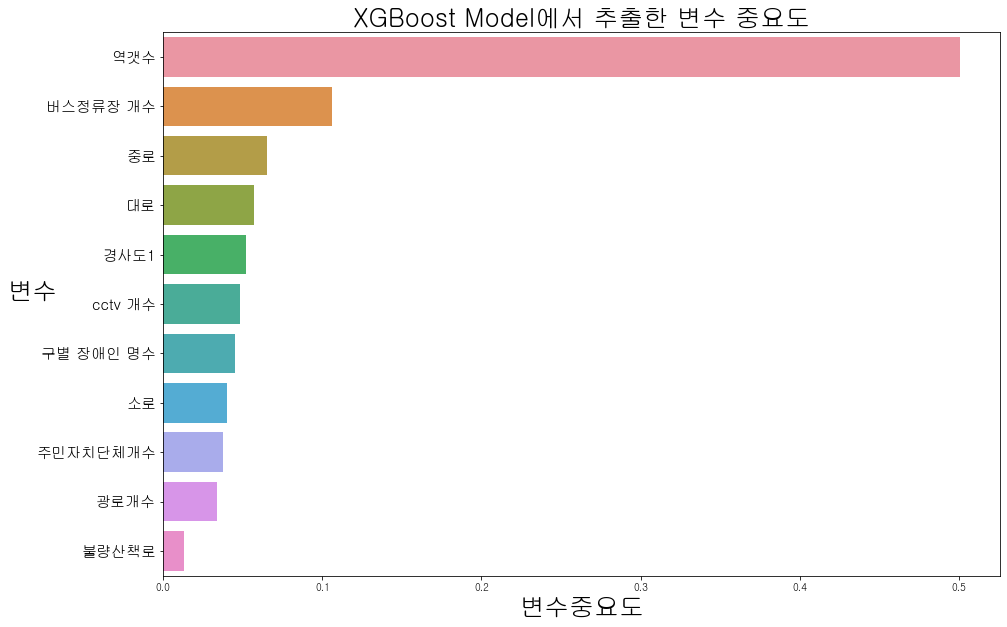

In [34]:
fig, ax = plt.subplots(figsize = [15, 10])
sns.barplot(data = fi_data, y = 'columns', x = 'FeatureImportance')
ax.set_title('XGBoost Model에서 추출한 변수 중요도', fontsize = 25)
plt.xlabel('변수중요도', fontsize=25)
plt.ylabel('변수', fontsize=25, rotation=0)
plt.yticks(fontsize=15)

In [28]:
data = pd.DataFrame({'y' : y, 'y_hat' : model.predict(pd.DataFrame(scaler.fit_transform(data_not)))}).reset_index().melt('index')
data

,index,variable,value
0,0,y,18.000000
1,1,y,10.000000
2,2,y,15.000000
3,3,y,15.000000
4,4,y,7.000000
...,...,...,...
213,105,y_hat,235.946686
214,106,y_hat,130.426041
215,107,y_hat,79.782257
216,108,y_hat,93.336136


In [90]:
SSR = sum(np.power([x - y.mean() for x in model.predict(pd.DataFrame(scaler.fit_transform(data_not)))],2))
SST = sum(np.power([x - y.mean() for x in y],2))

In [96]:
R2 = SSR/SST
r_R2 = np.round(R2, 3)
r_R2

0.976

AdjR2 : 1 - ((n-1)/(n-p)) * (1 - R2) 

In [98]:
AdjR2 = 1 - ((len(y) - 1)/(len(y) - len(data_not.columns))) * (1 - R2)
r_AdjR2 = np.round(AdjR2, 3)
r_AdjR2

0.974

[Text(0, 0.5, '사고횟수')]

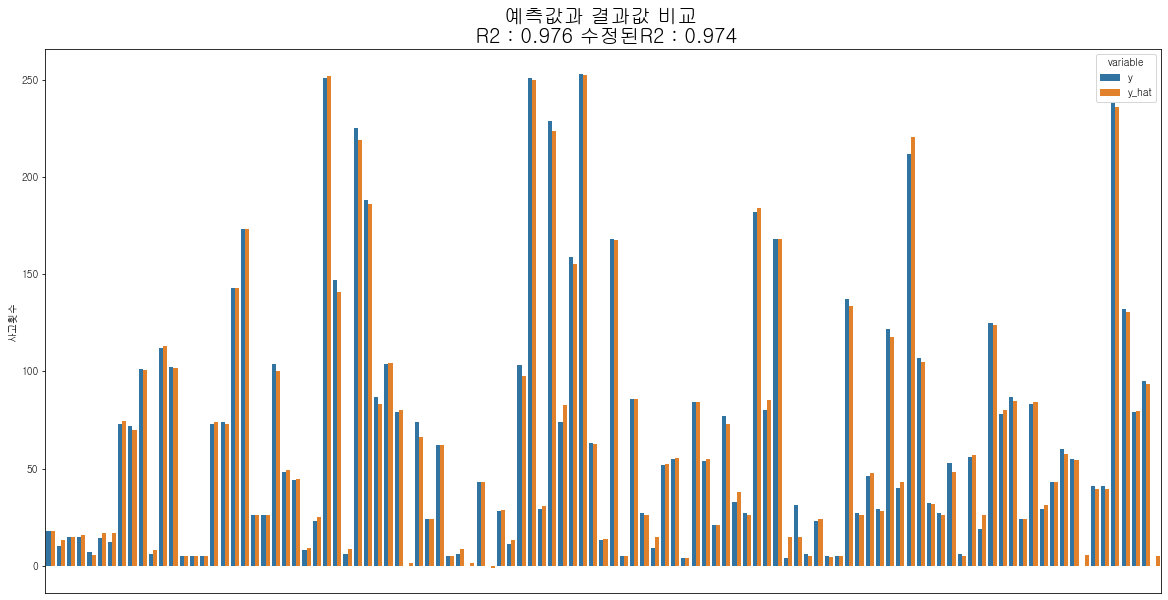

In [99]:
fig, ax = plt.subplots(figsize = [20,10])
sns.barplot(data = data, x = 'index', y = 'value', hue = 'variable')
ax.set_title(f'예측값과 결과값 비교 \n R2 : {r_R2} 수정된R2 : {r_AdjR2}', fontsize = 20)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.tick_params(bottom=False)
ax.set(ylabel='사고횟수')

<h1>선형회귀</h1>
  
작은 데이터기에 그냥 OLS로 구할것임  
->일반 선형회귀와 릿지회귀 사용해볼것. 

In [25]:
import  statsmodels.api as sm

In [17]:
scaler = StandardScaler()
data = pd.read_csv("분석용 데이터 최종_과속방지턱제거_불량산책로추가_진짜최종.csv", encoding = 'EUC-KR', index_col=0).reset_index(drop=True)
data
X = data.loc[:,[x for x in data.columns if x != 'total']]
y = data['total']
X_std = scaler.fit_transform(X)